In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as s
import seaborn as sns

In [9]:
data = pd.read_csv("/kaggle/input/ad-sales-prediction/DigitalAd_dataset.csv")

Data Prepration

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [11]:
data.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [12]:
data.tail()

,Age,Salary,Status
395,35,65000,0
396,26,80000,0
397,26,52000,0
398,20,86000,0
399,32,18000,0


In [13]:
data.isnull().sum()

Age       0
Salary    0
Status    0
dtype: int64

In [21]:
# deciding the type of variable (Catagorical or numerical)
cat=[]
num=[]
for column in data.columns:
    if data[column].nunique()<10:
        cat.append(column)
    else:
        num.append(column)

In [22]:
print(cat)

['Status']


In [23]:
print(num)

['Age', 'Salary']


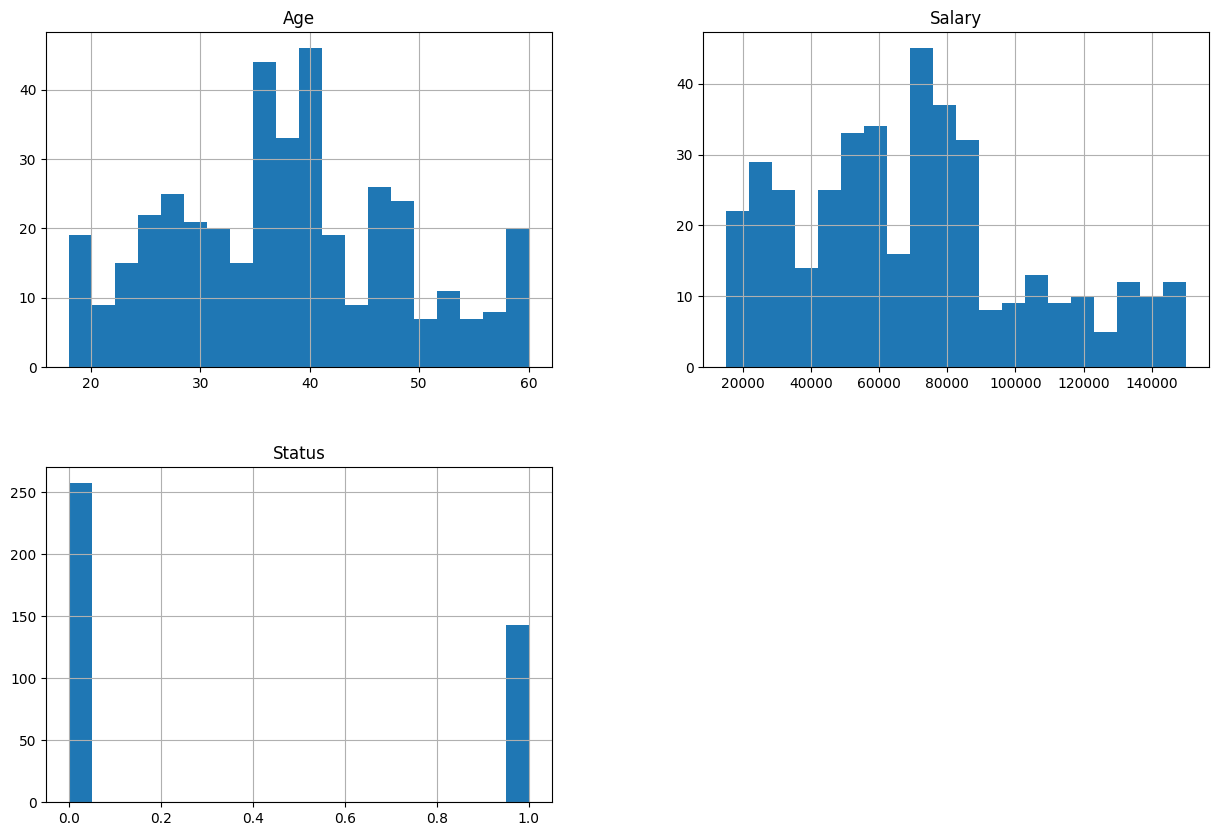

In [15]:
data.hist(figsize=(15, 10), bins=20)
plt.show()

### EDA

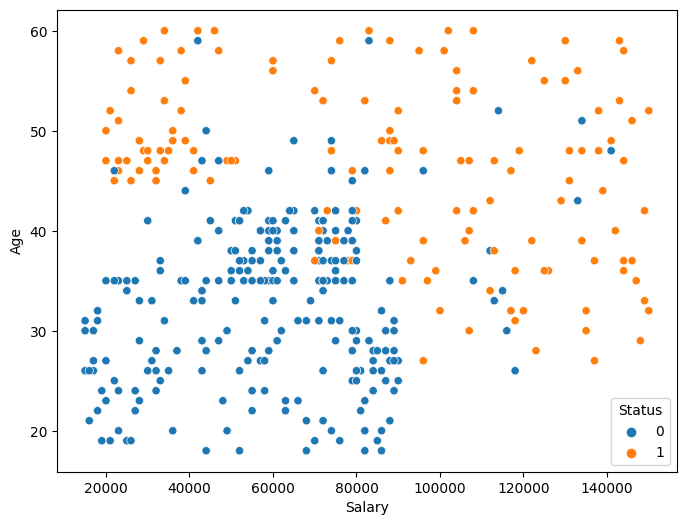

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='Age', hue='Status', data=data)
plt.show()

Here ,we can see that the age and salary are not related but there are more purchases above the age of 45

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


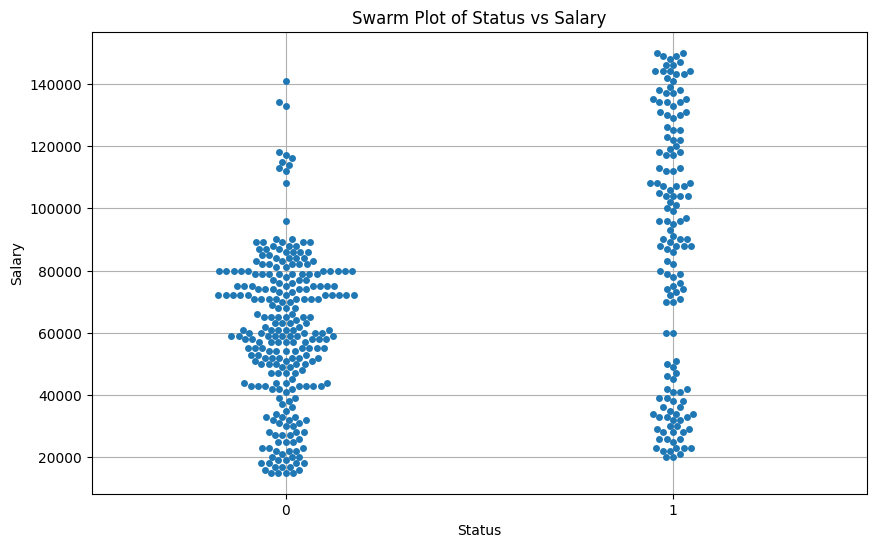

In [27]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.swarmplot(x=data['Status'], y=data['Salary'])  # Create a swarm plot
plt.xlabel('Status')  # Set x-axis label
plt.ylabel('Salary')  # Set y-axis label
plt.title('Swarm Plot of {} vs {}'.format('Status', 'Salary'))  # Set the title
plt.grid(True)  # Enable grid
plt.show()  # Display the plot

Here, we can observe that more purchases are done above the salary 95,000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


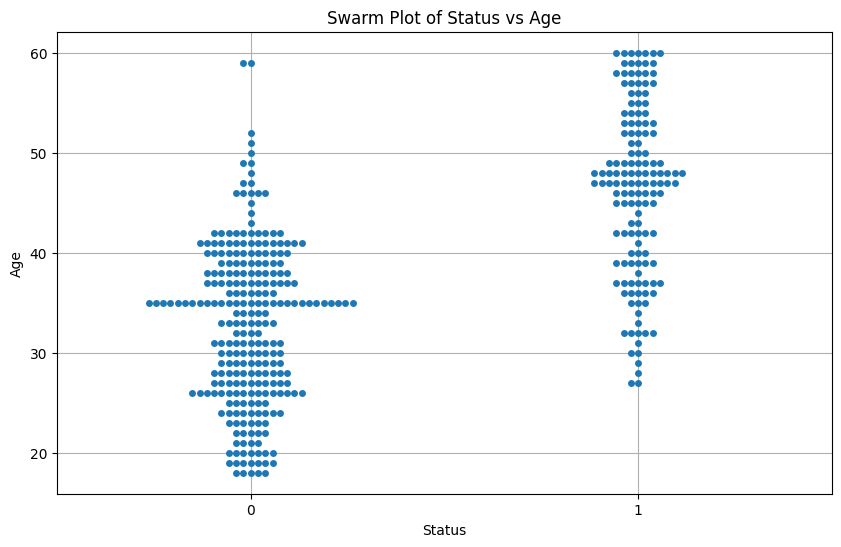

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.swarmplot(x=data['Status'], y=data['Age'])  # Create a swarm plot
plt.xlabel('Status')  # Set x-axis label
plt.ylabel('Age')  # Set y-axis label
plt.title('Swarm Plot of {} vs {}'.format('Status', 'Age'))  # Set the title
plt.grid(True)  # Enable grid
plt.show()  # Display the plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


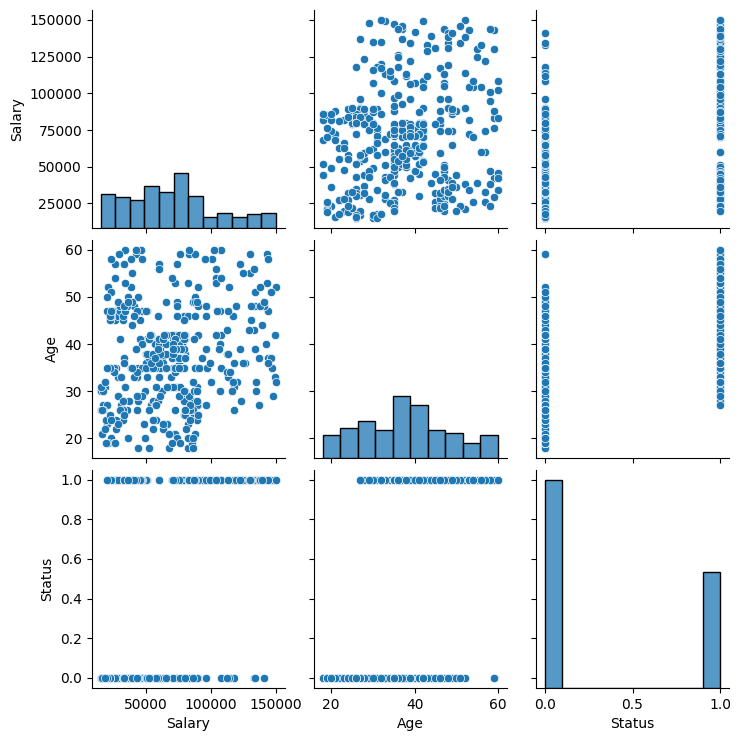

In [29]:
sns.pairplot(data,vars=['Salary', 'Age', 'Status'])
plt.show()

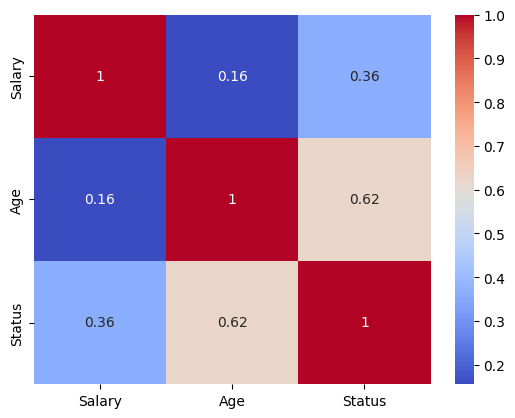

In [31]:
correlation_matrix=data[['Salary', 'Age', 'Status']].corr()
sns.heatmap(correlation_matrix, annot= True , cmap="coolwarm")
plt.show()

Let's continue with Model training

In [34]:
from sklearn.model_selection import train_test_split
selected_feature=['Salary','Age']
x=data[selected_feature]
y=data['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



1. `from sklearn.linear_model import LogisticRegression`: This line imports the `LogisticRegression` class from the `linear_model` module in the `sklearn` (Scikit-learn) library. Logistic regression is a classification algorithm used for binary classification tasks.

2. `model = LogisticRegression(random_state=0)`: This line creates an instance of the `LogisticRegression` class and initializes it with the specified parameters. `random_state=0` sets the random seed to ensure reproducibility of results. 

3. `model.fit(x_train, y_train)`: This line fits the logistic regression model to the training data. The `fit` method takes two main arguments:
   - `x_train`: This is the feature matrix (input variables) of the training data.
   - `y_train`: This is the target vector (output variable) of the training data. It contains the labels or classes corresponding to each sample in `x_train`.
   
   The `fit` method trains the model by adjusting its parameters to minimize the loss function, making predictions more accurate. After this line is executed, `model` will contain the trained logistic regression model that can be used to make predictions on new data.

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

This code snippet takes input for a new customer's age and salary, uses the trained logistic regression model (`model`) to predict whether the customer will buy a product, and then prints the prediction.

Here's a breakdown of each line:

1. `age = int(input("Enter New Customer Age: "))`: This line prompts the user to input the new customer's age. The `input()` function takes user input as a string, and `int()` converts it to an integer.

2. `sal = int(input("Enter New Customer Salary: "))`: This line prompts the user to input the new customer's salary, similar to the previous line.

3. `newCust = [[age, sal]]`: This line creates a list containing the new customer's age and salary. The data is organized in a nested list format because `model.predict()` expects a 2D array.

4. `result = model.predict(sc.transform(newCust))`: This line scales the new customer's data using the same scaler (`sc`) used during model training and then uses the trained logistic regression model (`model`) to predict whether the customer will buy a product. The `predict()` method returns the predicted class label (`0` or `1`).

5. `print(result)`: This line prints the predicted class label (`0` or `1`) to the console.

6. `if result == 1:`: This line checks if the predicted class label is `1`, indicating that the customer will buy the product.

7. `print("Customer will Buy")`: If the predicted class label is `1`, this line prints "Customer will Buy" to the console.

8. `else:`: If the predicted class label is not `1`, this line executes the following block of code.

9. `print("Customer won't Buy")`: This line prints "Customer won't Buy" to the console, indicating that the customer will not buy the product.

This code snippet is useful for making predictions on new customer data using the trained logistic regression model.

In [46]:
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
print(result)
if result == 1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")

Enter New Customer Age:  45
Enter New Customer Salary:  70000


[1]
Customer will Buy


In [ ]:



1. `y_pred = model.predict(x_test)`: This line uses the trained model (`model`) to predict the target variable values for the test data (`x_test`).
    It generates predicted values (`y_pred`) based on the input features (`x_test`).

2. `y_test_np = y_test.to_numpy()`: This line converts the Pandas Series object `y_test` (which contains the actual target variable values for the test data)
    to a NumPy array. This conversion is necessary to perform array operations and reshape the array later.

3. `np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_np.reshape(len(y_test), 1)), axis=1)`: This line concatenates the predicted values (`y_pred`) and 
    the actual values (`y_test_np`) along the horizontal axis (`axis=1`) for comparison. Before concatenation, both arrays are reshaped to have a single column and the same number of rows as the length of the arrays (`len(y_pred)` and `len(y_test)`).

4. `print(...)`: This line prints the concatenated array to the console, showing the predicted values and the actual values side by side for comparison.

This code snippet is commonly used in machine learning to evaluate the performance of a model by comparing its predictions with the ground truth. 
It helps to assess how well the model generalizes to unseen data.

In [51]:

y_pred = model.predict(x_test)

# Convert Pandas Series to NumPy arrays before reshaping
y_test_np = y_test.to_numpy()

# Concatenating y_pred and y_test for comparison
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_np.reshape(len(y_test), 1)), axis=1))




[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]




1. `from sklearn.metrics import confusion_matrix, accuracy_score`: This line imports the `confusion_matrix` and `accuracy_score` functions from the `sklearn.metrics` module. These functions are used to evaluate the performance of classification models.

2. `cm = confusion_matrix(y_test, y_pred)`: This line calculates the confusion matrix based on the true labels (`y_test`) and the predicted labels (`y_pred`). The confusion matrix is a table that describes the performance of a classification model by comparing the true and predicted labels.

3. `print("Confusion Matrix:")`: This line prints a header indicating that the following output is the confusion matrix.

4. `print(cm)`: This line prints the confusion matrix to the console.

5. `print("Accuracy of model: {0}%".format(accuracy_score(y_test, y_pred) * 100))`: This line calculates the accuracy score of the model using the true labels (`y_test`) and the predicted labels (`y_pred`). The accuracy score is the proportion of correctly predicted labels out of all labels. It is expressed as a percentage. The line prints the accuracy score to the console.

This code snippet is commonly used to evaluate the performance of classification models and provides insights into how well the model is performing in terms of predicting the correct class labels.

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy of model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix:
[[62  6]
 [ 8 24]]
Accuracy of model: 86.0%


Conclusion : Here we got an accuracy of 86.0% which defines that our model gives 86% correct output